In [1]:
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def parse_params(filename: str) -> dict[str|int,float]:
    params = {}
    with open(filename, "r") as f:
        for line in f:
            if m := re.match(r"^#<?([^ \t>]+)>?\s?=\s?([0-9.-]+)$", line):
                param = m.group(1)
                try:
                    param = int(param)
                except ValueError:
                    pass
                value = float(m.group(2))
                params[param] = value
    return params

In [3]:
params = parse_params("params-20240923T194437.nc")
params

{'_a': 0.0,
 '_abs_a': 0.0,
 '_abs_b': 0.0,
 '_abs_c': 0.0,
 '_abs_x': 286.48216299999996,
 '_abs_y': 153.095697,
 '_abs_z': -84.06476789307824,
 '_absolute': 1.0,
 '_adaptive_feed': 0.0,
 '_b': 0.0,
 '_c': 0.0,
 '_call_level': 1.0,
 '_ccomp': 400.0,
 '_coord_system': 540.0,
 '_current_pocket': 1.0,
 '_current_tool': 1.0,
 '_feed': 25.0,
 '_feed_hold': 1.0,
 '_feed_override': 1.0,
 '_flood': 0.0,
 '_ijk_absolute_mode': 0.0,
 '_imperial': 0.0,
 '_incremental': 0.0,
 '_ini[change_position]x': 150.0,
 '_ini[change_position]y': 595.0,
 '_ini[change_position]z': 0.0,
 '_ini[toolsensor]maxprobe': -110.0,
 '_ini[toolsensor]rapid_speed': 1000.0,
 '_ini[toolsensor]x': 9.5,
 '_ini[toolsensor]y': 595.36,
 '_ini[toolsensor]z': -10.0,
 '_inverse_time': 0.0,
 '_lathe_diameter_mode': 0.0,
 '_lathe_radius_mode': 1.0,
 '_line': 0.0,
 '_metric': 1.0,
 '_metric_machine': 1.0,
 '_mist': 0.0,
 '_motion_mode': 0.0,
 '_plane': 170.0,
 '_psng_absolute': 1.0,
 '_psng_feed': 25.0,
 '_psng_metric': 1.0,
 '_remap

In [4]:
y_probes = int(params[104])
y_probes

10

In [5]:
x_probes = 11  # hardcoded in o5 repeat
x_probes

11

In [6]:
#z_probe = #[#101 * y_probes + #102 + 500]
def get_probe(x, y):
    return params[500 + x*y_probes + y]

In [7]:
probes = [params[i] for i in range(500, 500+x_probes*y_probes)]
#probes

In [8]:
#heightmap = np.full((y_probes, x_probes), np.nan)
heightmap = np.reshape(probes, (x_probes,y_probes))
heightmap = heightmap.T  # transpose so that x is horizontal
heightmap

array([[ 0.        , -0.01351637, -0.01351637, -0.00643304,  0.01273362,
         0.02398361,  0.03148361,  0.03856694,  0.03190027,  0.0464836 ,
         0.06148359],
       [-0.00601637, -0.01393304, -0.01351637, -0.00893304,  0.01606695,
         0.02356694,  0.03106694,  0.03148361,  0.03106694,  0.03856694,
         0.0539836 ],
       [-0.00601637, -0.02101637, -0.01393304, -0.00643304,  0.01315028,
         0.02398361,  0.03106694,  0.03148361,  0.02440028,  0.03190027,
         0.05065026],
       [-0.02851636, -0.03601636, -0.02893303, -0.01393304,  0.00148362,
         0.00940028,  0.01648361,  0.01648361,  0.01606695,  0.02398361,
         0.04606693],
       [-0.03601636, -0.05101635, -0.04351636, -0.02893303, -0.01351637,
         0.00148362,  0.00898362,  0.00898362,  0.00856695,  0.01648361,
         0.03190027],
       [-0.05893302, -0.07351634, -0.06643301, -0.05851635, -0.03643303,
        -0.02143303, -0.01351637, -0.01351637, -0.01351637, -0.00601637,
         0.016

<Axes: >

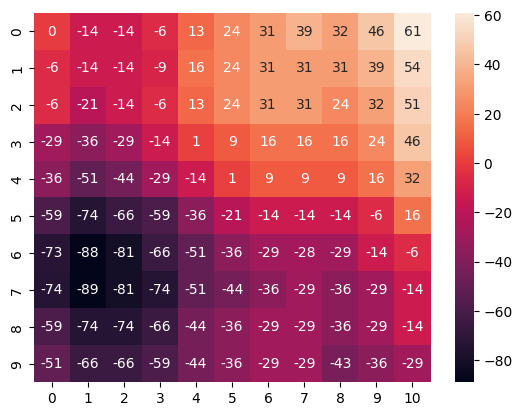

In [9]:
sns.heatmap(np.round(heightmap*1000), annot=True)

In [10]:
get_probe(0,0)

0.0

In [11]:
get_probe(0,1)

-0.006016374915105871

In [12]:
get_probe(1,0)

-0.013516371313926356

Text(0.5, 0.5, 'y')

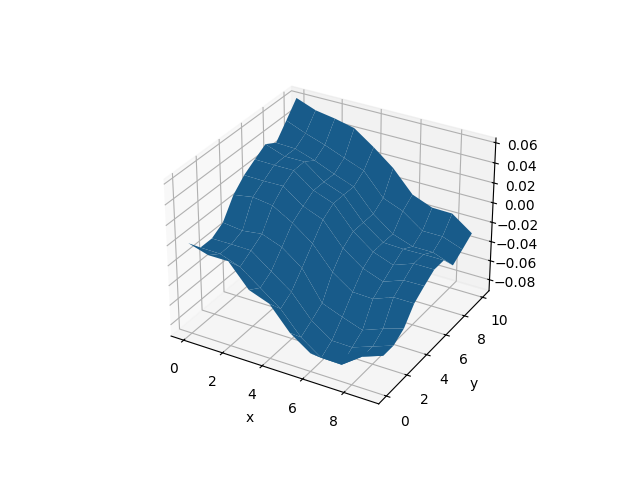

In [13]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X,Y = np.meshgrid(np.arange(heightmap.shape[0]), np.arange(heightmap.shape[1]))
ax.plot_surface(X, Y, heightmap.T)
plt.xlabel("x")
plt.ylabel("y")